[Go To INDEX](Index.ipynb)

### Pandas Foundations
### Data Inspection and ingestion
- [Inspecting Data types](#inspect)
- [Numpy and pandas working together](#numpy)
- [Zip List to build Dataframe](#zip)
- [labelling your data](#label)
- [Building your dataframe with BROADCASTING](#broad)
- [Delimiters, headers, and extensions](#delimit)
* [Plotting with pandas](#plot)
- [Plotting DataFrame](#pltDF)

### Visual Exploratory data analysis
 * [Pandas Line Plots](#pplot)
 * [Pandas scatter plots](#scatPlot)
 
### Statistical Exploratory Data analysis
 * [Summary Stats](#sstat)
 * [Median vs Mean](#mmean) 
 * [Quantiles](#quant)
 * [Standard Deviation of Temperature](#std)
 * [Filtering and Counting](#filter)
 * [Separate and Summarize](#separate)
 * [Separate and Plot](#seplot)
 
## [Time Series in Pandas](#time)
   * [Filtering and Slicing](#fslice)
   * [Partial string indexing and slicing](#partial)
   * [Reindexing the Index](#reindex)
   
  
   
### [Resample pandas time series](#roll)
     
   * [Resampling and Frequency](#resample)
   * [Separating and Resampling](#se_resample)
   * [Rolling mean and Frequency](#rmfreq)
   * [Resampling and rolling with it](#resam_roll)
   * [Method chaining and filtering](#mfilter)
   
### [Manipulating pandas time series](#mtser)
   * [Method Chaining and filtering](#mfilter)
   * [Missing Value and interpolation](#mvi)
   * [Time zones and conversion](#timc)
   
### [Visualizating pandas time series] (#vpts)
   * Plotting time series, datetime indexing
   * [Plotting date ranges, partial indexing](#pi)


## [Case Study : Sunlight in Austin](#austin)

## Pandas Foundation

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/world_ind_pop_data.csv')
df.head()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
0,Arab World,ARB,1960,9.249590e+07,31.285384
1,Caribbean small states,CSS,1960,4.190810e+06,31.597490
2,Central Europe and the Baltics,CEB,1960,9.140158e+07,44.507921
3,East Asia & Pacific (all income levels),EAS,1960,1.042475e+09,22.471132
4,East Asia & Pacific (developing only),EAP,1960,8.964930e+08,16.917679


In [3]:
df.tail()

,CountryName,CountryCode,Year,Total Population,Urban population (% of total)
13369,Virgin Islands (U.S.),VIR,2014,104170.0,95.203
13370,West Bank and Gaza,WBG,2014,4294682.0,75.026
13371,"Yemen, Rep.",YEM,2014,26183676.0,34.027
13372,Zambia,ZMB,2014,15721343.0,40.472
13373,Zimbabwe,ZWE,2014,15245855.0,32.501


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13374 entries, 0 to 13373
Data columns (total 5 columns):
CountryName                      13374 non-null object
CountryCode                      13374 non-null object
Year                             13374 non-null int64
Total Population                 13374 non-null float64
Urban population (% of total)    13374 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 522.5+ KB


We can use the DataFrame attribute .values to represent a DataFrame df as a NumPy array. You can also pass pandas data structures to NumPy methods.

<p id = 'numpy'><p>
### NumPy and pandas working together

We can use the DataFrame attribute .values to represent a DataFrame df as a NumPy array. 


In [5]:
worldPopulation = pd.read_csv('./data/world_population.csv')
worldPopulation.head()

,Year,Total Population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09


In [6]:
# Create array of DataFrame values: np_vals
np_vals = worldPopulation.values
np_vals

array([[1.96000000e+03, 3.03497056e+09],
       [1.97000000e+03, 3.68482270e+09],
       [1.98000000e+03, 4.43659036e+09],
       [1.99000000e+03, 5.28271599e+09],
       [2.00000000e+03, 6.11597449e+09],
       [2.01000000e+03, 6.92428294e+09]])

In [7]:
# Create new array of base 10 logarithm values: np_vals_log10
np_vals_log10 = np.log10(np_vals)
np_vals_log10

array([[3.29225607, 9.48215448],
       [3.29446623, 9.5664166 ],
       [3.29666519, 9.64704933],
       [3.29885308, 9.72285726],
       [3.30103   , 9.78646566],
       [3.30319606, 9.84037481]])

In [8]:
df_log10 = np.log10(worldPopulation)
df_log10

,Year,Total Population
0,3.292256,9.482154
1,3.294466,9.566417
2,3.296665,9.647049
3,3.298853,9.722857
4,3.301030,9.786466
5,3.303196,9.840375


In [9]:
# Print original and new data containers
[print(x, 'has type', type(eval(x))) for x in ['np_vals', 'np_vals_log10', 'df', 'df_log10']]

np_vals has type <class 'numpy.ndarray'>
np_vals_log10 has type <class 'numpy.ndarray'>
df has type <class 'pandas.core.frame.DataFrame'>
df_log10 has type <class 'pandas.core.frame.DataFrame'>


[None, None, None, None]

<p id = 'zip'> <p>
### Zip List to build Dataframe
Use lists to construct a list of tuples, use the list of tuples to construct a dictionary, and then use that dictionary to construct a DataFrame. In doing so, you'll make use of the list(), zip(), dict() and pd.DataFrame() functions. 


In [10]:
list_keys = ['Country', 'Total']

In [11]:
list_values = [['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

In [12]:
list_values

[['United States', 'Soviet Union', 'United Kingdom'], [1118, 473, 273]]

In [13]:
zipped = zip(list_keys, list_values)

In [14]:
zipped

In [15]:
data = dict(zipped)
data

{'Country': ['United States', 'Soviet Union', 'United Kingdom'],
 'Total': [1118, 473, 273]}

In [16]:
df = pd.DataFrame(data)
df.head()

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


<p id = 'label'><p>
###  Labelling your columns `df.columns`
You can use the DataFrame attribute df.columns to view and assign new string labels to columns in a pandas DataFrame.




In [17]:
df = pd.read_csv('./data/airquality.csv')
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [18]:
# Build a list of labels: list_labels
list_labels = ['Ozones', 'SolarRadiation', 'Winds', 'Temperature', 'Months', 'Days']

# Assign the list of labels to the columns attribute: df.columns
df.columns = list_labels
df.head()

,Ozones,SolarRadiation,Winds,Temperature,Months,Days
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


<p id ='broad'> <p>
### Building your dataframe with BROADCASTING

You can implicitly use 'broadcasting', a feature of NumPy, when creating pandas DataFrames. In this exercise, you're going to create a DataFrame of cities in Pennsylvania that contains the city name in one column and the state name in the second. 



In [19]:
cities = ['Manheim',
 'Preston park',
 'Biglerville',
 'Indiana',
 'Curwensville',
 'Crown',
 'Harveys lake',
 'Mineral springs',
 'Cassville',
 'Hannastown',
 'Saltsburg',
 'Tunkhannock',
 'Pittsburgh',
 'Lemasters',
 'Great bend']

In [20]:
cities

['Manheim',
 'Preston park',
 'Biglerville',
 'Indiana',
 'Curwensville',
 'Crown',
 'Harveys lake',
 'Mineral springs',
 'Cassville',
 'Hannastown',
 'Saltsburg',
 'Tunkhannock',
 'Pittsburgh',
 'Lemasters',
 'Great bend']

In [21]:
pd.DataFrame({'state': 'PA', 'cities':cities})

,state,cities
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville
5,PA,Crown
6,PA,Harveys lake
7,PA,Mineral springs
8,PA,Cassville
9,PA,Hannastown


In [22]:
#Year= ['1960', '1970', '1980', '1990', '2000', '2010']      

In [23]:
#new_labels =[3.034971e+09, 3.684823e+09, 4.436590e+09, 5.282716e+09, 6.115974e+09, 6.924283e+09] 

In [24]:
#df1 = pd.DataFrame({'Year':Year, 'Pop':new_labels})

In [25]:
#df1.to_csv('./data/datafile.csv')

In [26]:
df1 = pd.read_csv('./data/datafile.csv', header = 0, names = ['year', 'population'])

In [27]:
df1

,year,population
0,1960,3.034971e+09
1,1970,3.684823e+09
2,1980,4.436590e+09
3,1990,5.282716e+09
4,2000,6.115974e+09
5,2010,6.924283e+09


<p id ='delimit'> <p>
### Delimiters, headers, and extensions



In [28]:
df1 = pd.read_csv('./data/messy_stock_data.tsv')
df1.head()

,The following stock data was collect on 2016-AUG-25 from an unknown source
These kind of ocmments are not very useful,are they?
probably should just throw this line away too,but not the next since those are column labels
name Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec,NaN
# So that line you just read has all the column headers labels,NaN
IBM 156.08 160.01 159.81 165.22 172.25 167.15 164.75 152.77 145.36 146.11 137.21 137.96,NaN


In [29]:
more ./data/messy_stock_data.tsv

In [30]:
df2 = pd.read_csv('./data/messy_stock_data.tsv', delimiter=' ' , header= 3, comment= '#')
df2

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [31]:
df2.to_csv('./data/stocksClean.csv', index = False)

In [32]:
pd.read_csv('./data/stocksClean.csv')

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


<p id ='plot'><p>
### Plotting with pandas

In [33]:
df2 = pd.read_csv('./data/weather_data_austin_2010.csv')
df2.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [34]:
temp = df2[['Temperature']]
temp.head()

,Temperature
0,46.2
1,44.6
2,44.1
3,43.8
4,43.5


Text(0,0.5,'Hours since midnight August 1, 2010')

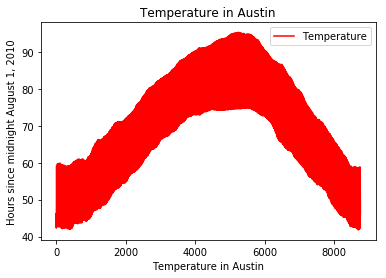

In [35]:
temp.plot(color = 'red')
plt.title('Temperature in Austin')
plt.xlabel('Temperature in Austin')
plt.ylabel('Hours since midnight August 1, 2010')


<p id ='pltDF'> <p>
### Plotting DataFrames

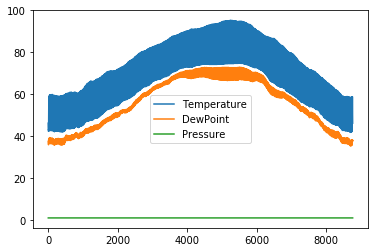

In [36]:
df2.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ea796a0>,
      dtype=object)

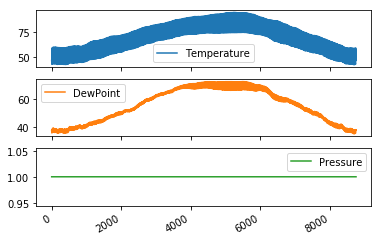

In [37]:
df2.plot(subplots=True)

In [38]:
#%matplotlib inline

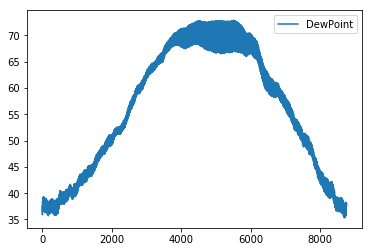

In [39]:
# Plot just the Dew Point data
column_list1 = ['DewPoint']
df2[column_list1].plot()


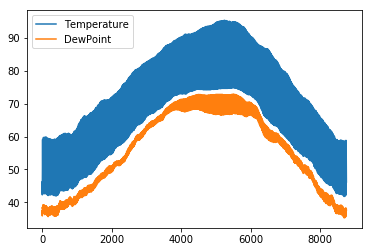

In [40]:
column_list2 = ['Temperature' , 'DewPoint']
df2[column_list2].plot()

<p id = 'pplot'> <p>
### pandas line plots

In [41]:
df = pd.read_csv('./data/stocksCleanWithIndex.csv')
df.head()

,name,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,IBM,156.08,160.01,159.81,165.22,172.25,167.15,164.75,152.77,145.36,146.11,137.21,137.96
1,MSFT,45.51,43.08,42.13,43.47,47.53,45.96,45.61,45.51,43.56,48.70,53.88,55.40
2,GOOGLE,512.42,537.99,559.72,540.50,535.24,532.92,590.09,636.84,617.93,663.59,735.39,755.35
3,APPLE,110.64,125.43,125.97,127.29,128.76,127.81,125.34,113.39,112.80,113.36,118.16,111.73


In [42]:

df.set_index('name', inplace =True)

In [43]:
df=df.T

In [44]:
df=df.reset_index()


In [45]:
df.head()

name,index,IBM,MSFT,GOOGLE,APPLE
0,Jan,156.08,45.51,512.42,110.64
1,Feb,160.01,43.08,537.99,125.43
2,Mar,159.81,42.13,559.72,125.97
3,Apr,165.22,43.47,540.50,127.29
4,May,172.25,47.53,535.24,128.76


Text(0,0.5,'Price ($US)')

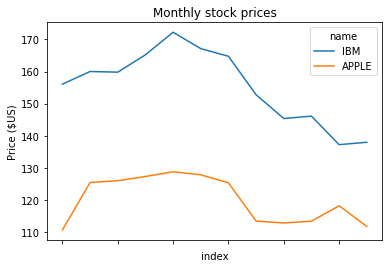

In [46]:
df.plot(x = 'index' , y =  ['IBM', 'APPLE'])
plt.title('Monthly stock prices')
# Add the title
plt.title('Monthly stock prices')

# Add the y-axis label
plt.ylabel('Price ($US)')


<p id = 'scatPlot'> <p>
### Pandas scatter Plot

In [47]:
fuel_df = pd.read_csv('./data/auto-mpg.csv')
fuel_df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [48]:
# Generate a scatter plot
fuel_df.plot(kind='scatter', x='hp', y='mpg', s=sizes)

# Add the title
plt.title('Fuel efficiency vs Horse-power')

# Add the x-axis label
plt.xlabel('Horse-power')

# Add the y-axis label
plt.ylabel('Fuel efficiency (mpg)')

# Display the plot
plt.show()

NameError: name 'sizes' is not defined

### Pandas as Box Plot

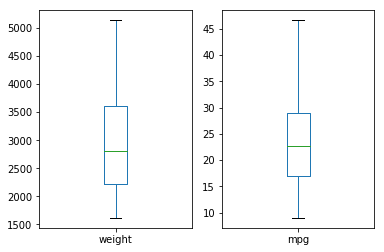

In [49]:
# Make a list of the column names to be plotted: cols
cols = ['weight', 'mpg']

# Generate the box plots
fuel_df[cols].plot(kind='box', subplots=True)

# Display the plot
plt.show()

### pandas hist, pdf and cdf

In [50]:
tip = pd.read_csv('./data/tips.csv')
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


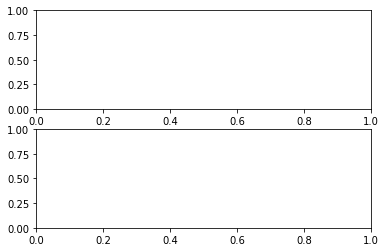

In [51]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)


In [52]:
tip['fraction'] =tip.tip/tip.total_bill
tip.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


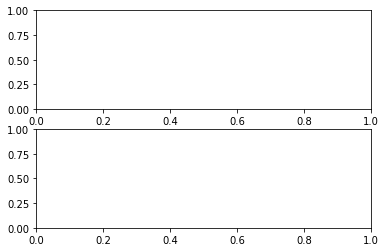

In [53]:
 #This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)


In [54]:
# Plot the PDF
tip.fraction.plot(ax=axes[0], kind='hist', density=True, bins=30, range=(0,.3))


<p id = 'sstats'> <p>
## Summary Statistics

In [55]:
fuel_df.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [56]:
fuel_df.mpg.median()

22.75

In [67]:
wdegree =   pd.read_csv('./data/percent-bachelors-degrees-women-usa.csv', index_col=0)
wdegree.head()

,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
Year,,,,,,,,,,,,,,,,,
1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [68]:
wdegree.Engineering.min()

0.8

In [69]:
wdegree.Engineering.max()

19.0

In [70]:
# Construct the mean percentage per year: mean
mean = wdegree.mean(axis = 'columns')

In [72]:
mean.head()

Year
1970    38.594697
1971    38.603481
1972    39.066075
1973    40.131826
1974    41.715916
dtype: float64

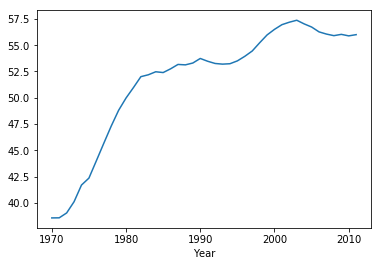

In [74]:
mean.plot()

<p id = 'mmean'><p>
### Median vs Mean

In [75]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [80]:
titanic['fare'].describe()


count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

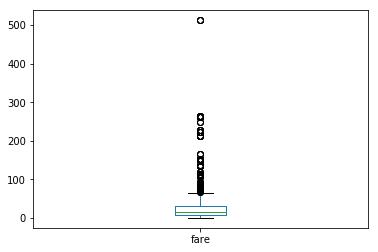

In [86]:
titanic['fare'].plot(kind='box')

In [108]:
gapminder = pd.read_csv('./data/life_expectancy_at_birth.csv', index_col=1)


gapminder.head()

,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [92]:
gapminder.columns

Index(['Unnamed: 0', 'Life expectancy', '1800', '1801', '1802', '1803', '1804',
       '1805', '1806', '1807',
       ...
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object', length=219)

<p id = 'quant'><p>
### Quantiles

#### The number of countries reported in 2015. 

In [109]:
gapminder['2015'].count()

208

In [110]:
del gapminder['Unnamed: 0']

In [111]:
gapminder.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Life expectancy,,,,,,,,,,,,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,...,52.4,52.8,53.3,53.6,54.0,54.4,54.8,54.9,53.8,52.72
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,76.6,76.8,77.0,77.2,77.4,77.5,77.7,77.9,78.0,78.10
Algeria,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,75.3,75.5,75.7,76.0,76.1,76.2,76.3,76.3,76.4,76.50


In [118]:
# Print the 5th and 95th percentiles

gapminder.quantile([0.05, 0.95])

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0.05,25.40,25.30,25.20,25.2,25.2,25.40,25.40,25.40,25.3,25.3,...,53.07,53.60,54.235,54.935,55.97,56.335,56.705,56.87,57.855,59.2555
0.95,37.92,37.35,38.37,38.0,38.3,38.37,38.37,38.37,38.0,38.0,...,80.73,80.93,81.200,81.365,81.60,81.665,81.830,82.00,82.100,82.1650


<p id = 'std'> <p>
### Standard Deviation of temperature

In [114]:
weather = pd.read_csv('./data/weather_data_austin_2010.csv')
weather.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [117]:
print(weather.Temperature.mean())
print(weather.DewPoint.mean())
print(weather.Temperature.std())

68.07725767781702
55.9390569699738
13.773378057209044


<p id ='filter'> <p>
### Filtering and counting

In [119]:
auto = pd.read_csv('./data/auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [127]:
auto[auto['origin']=='Asia']['origin'].count()

79

<p id = 'separate'> <p>
### Separate And Summarize
Let's use population filtering to determine how the automobiles in the US differ from the global average and standard deviation. How does the distribution of fuel efficiency (MPG) for the US differ from the global average and standard deviation?



In [128]:
# Compute the global mean and global standard deviation: global_mean, global_std
global_mean = auto.mean()
global_std = auto.std()


In [130]:
print(global_mean)
print(global_std)

mpg         23.445918
cyl          5.471939
displ      194.411990
hp         104.469388
weight    2977.584184
accel       15.541327
yr          75.979592
dtype: float64
mpg         7.805007
cyl         1.705783
displ     104.644004
hp         38.491160
weight    849.402560
accel       2.758864
yr          3.683737
dtype: float64


In [133]:
# Filter the US population from the origin column: us
us = auto.loc[auto['origin'] == 'US']
us.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,US,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,US,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,US,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,US,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,US,ford torino


In [135]:
# Compute the US mean and US standard deviation: us_mean, us_std
us_mean = us.mean()
us_std = us.std()
print(us_mean)
print(us_std)

mpg         20.033469
cyl          6.277551
displ      247.512245
hp         119.048980
weight    3372.489796
accel       14.990204
yr          75.591837
dtype: float64
mpg         6.440384
cyl         1.655996
displ      98.376347
hp         39.897790
weight    795.346690
accel       2.736020
yr          3.660368
dtype: float64


In [ ]:
# Print the differences
print(us_mean - global_mean)
print(us_std - global_std)

In [137]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


<p id = 'seplot'> <p>
### Separate and plot

In [161]:
# Display the box plots on 3 separate rows and 1 column
fig, axes = plt.subplots(nrows = 3, ncols = 1)


In [162]:
# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass']==1].plot(ax = axes[0], y = 'fare', kind = 'box')


In [163]:
# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass']==2].plot(ax = axes[1], y = 'fare', kind = 'box')


In [164]:
# Generate a box plot of the fare prices for the First passenger class
titanic.loc[titanic['pclass']==3].plot(ax = axes[2], y = 'fare', kind = 'box')


In [152]:
%matplotlib auto

Using matplotlib backend: MacOSX


<p id = 'time'><p>
    
## Time Series

<p id = 'fslice'> <p>
### Filter and Slicing

In [168]:
uber = pd.read_csv('./data/nyc_uber_2014.csv', index_col='Date/Time', parse_dates=True)
del uber['Unnamed: 0']
uber.head()

,Lat,Lon,Base
Date/Time,,,
2014-04-01 00:11:00,40.7690,-73.9549,B02512
2014-04-01 00:17:00,40.7267,-74.0345,B02512
2014-04-01 00:21:00,40.7316,-73.9873,B02512
2014-04-01 00:28:00,40.7588,-73.9776,B02512
2014-04-01 00:33:00,40.7594,-73.9722,B02512


<p id= 'created'> <p>
### Creating and using a DatetimeIndex

Pandas provides the `pd.to_datetime()` function for just this task. For example, if passed the list of strings `['2015-01-01 091234','2015-01-01 091234']` and a format specification variable, such as format=`'%Y-%m-%d %H%M%S`, pandas will parse the string into the proper datetime elements and build the datetime objects.


In [170]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 4 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
Date           8759 non-null object
dtypes: float64(3), object(1)
memory usage: 273.8+ KB


In [173]:
weather = pd.read_csv('./data/weather_data_austin_2010p2.csv')
weather.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [175]:
date_list = list(weather.Date)
temperature_list = list(weather.Temperature)

In [176]:
#### Prepare a format string: time_format
time_format='%Y-%m-%d %H:%M'

#### Convert date_list into a datetime object: my_datetimes
my_datetimes = pd.to_datetime(date_list, format=time_format)  

my_datetimes

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 01:00:00',
               '2010-01-01 02:00:00', '2010-01-01 03:00:00',
               '2010-01-01 04:00:00', '2010-01-01 05:00:00',
               '2010-01-01 06:00:00', '2010-01-01 07:00:00',
               '2010-01-01 08:00:00', '2010-01-01 09:00:00',
               ...
               '2010-12-31 14:00:00', '2010-12-31 15:00:00',
               '2010-12-31 16:00:00', '2010-12-31 17:00:00',
               '2010-12-31 18:00:00', '2010-12-31 19:00:00',
               '2010-12-31 20:00:00', '2010-12-31 21:00:00',
               '2010-12-31 22:00:00', '2010-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8759, freq=None)

In [178]:
#### Construct a pandas Series using temperature_list and my_datetimes: time_series
time_series = pd.Series(temperature_list, index=my_datetimes)
time_series.head()

2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
dtype: float64

<p id = 'partial'><p>
### Partial string indexing and slicing
Pandas time series support "partial string" indexing. What this means is that **even when passed only a portion of the datetime**, such as the date but not the time, pandas is remarkably good at doing what one would expect. Pandas datetime indexing also supports a wide variety of commonly used datetime string formats, even when mixed.




In [179]:
weather.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [181]:
weather = pd.read_csv('./data/weather_data_austin_2010p2.csv', parse_dates=True, index_col='Date')
weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [182]:
ts0 = weather.Temperature
ts0.head()

Date
2010-01-01 00:00:00    46.2
2010-01-01 01:00:00    44.6
2010-01-01 02:00:00    44.1
2010-01-01 03:00:00    43.8
2010-01-01 04:00:00    43.5
Name: Temperature, dtype: float64

Extract data from ts0 for a single hour - the hour from 9pm to 10pm on 2010-10-11. Assign it to ts1

In [183]:
ts1 = ts0.loc['2010-10-11 21:00:00':'2010-10-11 22:00:00']
ts1.head()

Date
2010-10-11 21:00:00    69.0
2010-10-11 22:00:00    67.7
Name: Temperature, dtype: float64

In [189]:
# Extract '2010-07-04' from ts0: ts2
ts2 = ts0.loc['2010-07-04']
ts2.shape

(24,)

In [188]:
# Extract data from '2010-12-15' to '2010-12-31': ts3
ts3 = ts0.loc['2010-12-15':'2010-12-31']
ts3.shape


(408,)

<p id = 'reindex'> <p>
### Reindexing the index

In [207]:

l1=[
'2016-07-01',     
'2016-07-02',    
'2016-07-03',     
'2016-07-04',     
'2016-07-05',     
'2016-07-06',    
'2016-07-07',     
'2016-07-08',     
'2016-07-09',    
'2016-07-10',    
'2016-07-11',    
'2016-07-12',    
'2016-07-13',    
'2016-07-14',    
'2016-07-15',    
'2016-07-16',    
'2016-07-17' ]

In [208]:
l11=list(range(0,17))

In [209]:
ts1=pd.Series(dict(zip(l1, l11)))
ts1

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    11
2016-07-13    12
2016-07-14    13
2016-07-15    14
2016-07-16    15
2016-07-17    16
dtype: int64

In [210]:
l2 = ['2016-07-01',  
'2016-07-04',  
'2016-07-05',  
'2016-07-06',  
'2016-07-07',  
'2016-07-08',  
'2016-07-11',  
'2016-07-12',  
'2016-07-13',  
'2016-07-14',  
'2016-07-15']

In [211]:
l22=list(range(0,11))
ts2 =pd.Series(dict(zip(l2, l22)))

In [230]:
ts2.head()

2016-07-01    0
2016-07-04    1
2016-07-05    2
2016-07-06    3
2016-07-07    4
dtype: int64

In this exercise, two time series data sets containing daily data have been pre-loaded for you, each indexed by dates. The first, ts1, includes weekends, but the second, ts2, does not. The goal is to combine the two data sets in a sensible way. Your job is to **reindex** the second data set so that it has weekends as well, and then add it to the first. When you are done, it would be informative to inspect your results.

Create a new time series ts3 by reindexing ts2 with the index of ts1. To do this, call `.reindex()` on ts2 and pass in the index of ts1 (`ts1.index`).


In [215]:
ts3 = ts2.reindex(ts1.index)

In [229]:
ts3.head()

2016-07-01    0.0
2016-07-02    NaN
2016-07-03    NaN
2016-07-04    1.0
2016-07-05    2.0
dtype: float64

In [217]:
# Reindex with fill method, using forward fill: ts4
ts4 = ts2.reindex(ts1.index, method = 'ffill')

In [228]:
ts4.head()

2016-07-01    0
2016-07-02    0
2016-07-03    0
2016-07-04    1
2016-07-05    2
dtype: int64

In [227]:
# Combine ts1 + ts2: sum12
sum12 = ts1+ts2
sum12.head()

2016-07-01    0.0
2016-07-02    NaN
2016-07-03    NaN
2016-07-04    4.0
2016-07-05    6.0
dtype: float64

In [226]:
sum13 = ts1+ts3
sum13.head()

2016-07-01    0.0
2016-07-02    NaN
2016-07-03    NaN
2016-07-04    4.0
2016-07-05    6.0
dtype: float64

In [225]:
sum14 = ts1+ts4
sum14.head()

2016-07-01    0
2016-07-02    1
2016-07-03    2
2016-07-04    4
2016-07-05    6
dtype: int64

<p id= 'resample'> <p>
### Resampling and frequency
    
 __Statistical methods over different time intervals __
 -mean(), sum(), count()
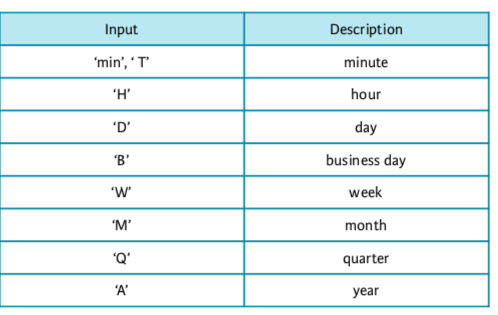

In [233]:
weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


Downsample the `'Temperature'` column of df to **6 hour data** using `.resample('6h')` and `.mean()`. Assign the result to df1.

In [236]:
df1 =weather.Temperature.resample('6h').mean()
df1.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

Downsample the 'Temperature' column of df to **daily data**•• using `.resample('D')` and then count the number of data points in each day with `.count()`. Assign the result df2.

In [238]:
df2 = weather.Temperature.resample('D').count()

In [239]:
df2.head()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

<p id= 'se_resample'><p>
### Separating and resampling


Your job is to resample the data using a variety of aggregation methods.


In [250]:
# Extract temperature data for August: august

august = weather.loc['2010-08', 'Temperature']
august.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

In [251]:
# Downsample to obtain only the daily highest temperatures in August: august_highs
august_highs = august.resample('D').max()
august_highs.head()


Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

In [252]:
# Extract temperature data for February: february
february = weather.loc['2010-02', 'Temperature']
february.head()

Date
2010-02-01 00:00:00    47.8
2010-02-01 01:00:00    46.8
2010-02-01 02:00:00    46.1
2010-02-01 03:00:00    45.5
2010-02-01 04:00:00    44.9
Name: Temperature, dtype: float64

In [254]:
# Downsample to obtain the daily lowest temperatures in February: february_lows
february_lows = february.resample('D').min()
february_lows.head()

Date
2010-02-01    43.8
2010-02-02    44.3
2010-02-03    44.6
2010-02-04    44.5
2010-02-05    44.3
Freq: D, Name: Temperature, dtype: float64

<p id = 'rmfreq'> <p>
### Rolling Mean OR Moving Averages and frequency
Rolling means (or moving averages) are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends.


In [255]:
weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [261]:
unsmoothed = weather.Temperature['2010-08-01':'2010-08-15']
unsmoothed.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

In [267]:
smoothed = unsmoothed.rolling(window=24).mean()
smoothed.head()

Date
2010-08-01 00:00:00   NaN
2010-08-01 01:00:00   NaN
2010-08-01 02:00:00   NaN
2010-08-01 03:00:00   NaN
2010-08-01 04:00:00   NaN
Name: Temperature, dtype: float64

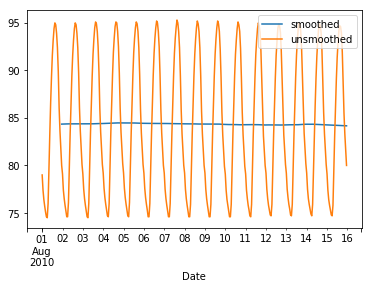

In [270]:
# Create a new DataFrame with columns smoothed and unsmoothed: august
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

# Plot both smoothed and unsmoothed data using august.plot().
august.plot()
plt.show()

In [269]:
%matplotlib inline

<p id = 'resam_roll'> <p>
### Resample and roll with it
Your job is to extract one month of data, resample to find the daily high temperatures, and then use a rolling and aggregation operation to smooth the data

In [271]:
august = weather.Temperature['2010-08']
august.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

In [272]:
# Resample to daily data, aggregating by max: daily_highs
daily_highs = august.resample('D').max()
daily_highs.head()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

In [275]:
# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window = 7).mean()
daily_highs_smoothed


Date
2010-08-01          NaN
2010-08-02          NaN
2010-08-03          NaN
2010-08-04          NaN
2010-08-05          NaN
2010-08-06          NaN
2010-08-07    95.114286
2010-08-08    95.142857
2010-08-09    95.171429
2010-08-10    95.171429
2010-08-11    95.157143
2010-08-12    95.128571
2010-08-13    95.100000
2010-08-14    95.042857
2010-08-15    94.971429
2010-08-16    94.900000
2010-08-17    94.857143
2010-08-18    94.828571
2010-08-19    94.814286
2010-08-20    94.785714
2010-08-21    94.757143
2010-08-22    94.742857
2010-08-23    94.714286
2010-08-24    94.642857
2010-08-25    94.542857
2010-08-26    94.428571
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64

<p id = 'mfilter'> <p>
## Manipulating Time Series in pandas    
### Method chaining and filtering

In [314]:
airline = pd.read_csv('./data/austin_airport_departure_data_2015_july.csv', skiprows= 15, parse_dates=True, index_col=1)
del airline['Unnamed: 17']
airline.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,
2015-07-01,WN,103.0,N8607M,MDW,06:30,06:52,165.0,147.0,22.0,07:01,9.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,144.0,N8609A,SAN,20:55,20:50,170.0,158.0,-5.0,21:03,13.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,178.0,N646SW,ELP,20:30,20:45,90.0,80.0,15.0,20:55,10.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,232.0,N204WN,ATL,05:45,05:49,135.0,137.0,4.0,06:01,12.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0


In [315]:
airline.columns

Index(['  Carrier Code', 'Flight Number', 'Tail Number',
       'Destination Airport ', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time(Minutes)',
       'Actual Elapsed Time(Minutes)', 'Departure Delay(Minutes)',
       'Wheels-off Time', 'Taxi-out Time(Minutes)', 'DelayCarrier(Minutes)',
       'DelayWeather(Minutes)', 'DelayNational Aviation System(Minutes)',
       'DelaySecurity(Minutes)', 'DelayLate Aircraft Arrival(Minutes)'],
      dtype='object')

In [316]:
airline.columns = airline.columns.str.strip()
airline.columns

Index(['Carrier Code', 'Flight Number', 'Tail Number', 'Destination Airport',
       'Scheduled Departure Time', 'Actual Departure Time',
       'Scheduled Elapsed Time(Minutes)', 'Actual Elapsed Time(Minutes)',
       'Departure Delay(Minutes)', 'Wheels-off Time', 'Taxi-out Time(Minutes)',
       'DelayCarrier(Minutes)', 'DelayWeather(Minutes)',
       'DelayNational Aviation System(Minutes)', 'DelaySecurity(Minutes)',
       'DelayLate Aircraft Arrival(Minutes)'],
      dtype='object')

In [317]:
dallas = airline[airline['Destination Airport']=='DAL']
dallas.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,
2015-07-01,WN,238.0,N233LV,DAL,12:30,12:34,55.0,48.0,4.0,12:41,7.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,285.0,N526SW,DAL,09:25,09:20,55.0,51.0,-5.0,09:27,7.0,0.0,0.0,0.0,0.0,0.0
2015-07-01,WN,657.0,N793SA,DAL,17:25,18:14,55.0,58.0,49.0,18:29,15.0,0.0,0.0,3.0,0.0,49.0
2015-07-01,WN,801.0,N629SW,DAL,15:35,16:05,60.0,49.0,30.0,16:14,9.0,2.0,0.0,0.0,0.0,17.0
2015-07-01,WN,857.0,N602SW,DAL,10:30,10:30,55.0,51.0,0.0,10:37,7.0,0.0,0.0,0.0,0.0,0.0


In [318]:
# Compute the total number of Dallas departures each day: daily_departures
daily_departures = dallas.resample('D').sum()


In [319]:
daily_departures.head()

,Flight Number,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
Date (MM/DD/YYYY),,,,,,,,,,
2015-07-01,18893.0,565.0,492.0,153.0,92.0,8.0,0.0,18.0,0.0,117.0
2015-07-02,18893.0,565.0,537.0,322.0,92.0,9.0,0.0,3.0,0.0,313.0
2015-07-03,17143.0,615.0,581.0,140.0,100.0,7.0,0.0,0.0,0.0,118.0
2015-07-04,1619.0,165.0,162.0,7.0,30.0,13.0,0.0,3.0,0.0,0.0
2015-07-05,19192.0,505.0,470.0,51.0,85.0,8.0,0.0,7.0,0.0,0.0


In [320]:
# Generate the summary statistics for daily Dallas departures: stats
stats = daily_departures.describe()

In [321]:
stats

,Flight Number,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.0,31.000000
mean,17498.483871,525.483871,487.838710,82.096774,84.096774,15.387097,0.0,6.096774,0.0,48.129032
std,4383.864672,113.176520,105.432157,82.580609,18.956714,44.294979,0.0,11.585493,0.0,62.710309
min,1619.000000,165.000000,162.000000,-2.000000,30.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,18893.000000,535.000000,483.000000,31.500000,83.500000,0.000000,0.0,0.000000,0.0,6.500000
50%,18893.000000,565.000000,522.000000,57.000000,88.000000,7.000000,0.0,2.000000,0.0,33.000000
75%,19042.500000,565.000000,536.000000,114.000000,93.000000,9.000000,0.0,7.500000,0.0,55.000000
max,20365.000000,620.000000,598.000000,337.000000,106.000000,246.000000,0.0,60.000000,0.0,313.000000


<p id = 'mvi'> <p>
### Missing Value and interpolation

In [322]:
ts1

2016-07-01     0
2016-07-02     1
2016-07-03     2
2016-07-04     3
2016-07-05     4
2016-07-06     5
2016-07-07     6
2016-07-08     7
2016-07-09     8
2016-07-10     9
2016-07-11    10
2016-07-12    11
2016-07-13    12
2016-07-14    13
2016-07-15    14
2016-07-16    15
2016-07-17    16
dtype: int64

In [323]:
ts2

2016-07-01     0
2016-07-04     1
2016-07-05     2
2016-07-06     3
2016-07-07     4
2016-07-08     5
2016-07-11     6
2016-07-12     7
2016-07-13     8
2016-07-14     9
2016-07-15    10
dtype: int64

In [324]:
# Reset the index of ts2 to ts1, and then use linear interpolation to fill in the NaNs: ts2_interp
ts2_interp = ts2.reindex(ts1.index).interpolate(how = 'linear')


In [325]:
ts2_interp

2016-07-01     0.000000
2016-07-02     0.333333
2016-07-03     0.666667
2016-07-04     1.000000
2016-07-05     2.000000
2016-07-06     3.000000
2016-07-07     4.000000
2016-07-08     5.000000
2016-07-09     5.333333
2016-07-10     5.666667
2016-07-11     6.000000
2016-07-12     7.000000
2016-07-13     8.000000
2016-07-14     9.000000
2016-07-15    10.000000
2016-07-16    10.000000
2016-07-17    10.000000
dtype: float64

In [326]:
 #Compute the absolute difference of ts1 and ts2_interp: differences 
differences = np.abs(ts1-ts2_interp)

# Generate and print summary statistics of the differences
print(differences.describe())

count    17.000000
mean      2.882353
std       1.585267
min       0.000000
25%       2.000000
50%       2.666667
75%       4.000000
max       6.000000
dtype: float64


<p id ='timc'><p>
### Time zones and conversion

In [360]:
# Build a Boolean mask to filter out all the 'LAX' departure flights: mask
mask = airline['Destination Airport'] == 'LAX'
mask.head()

Date (MM/DD/YYYY)
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01    False
Name: Destination Airport, dtype: bool

In [366]:
# Use the mask to subset the data: la
la = airline[mask]
la.reset_index(inplace=True)
la.head()

,Date (MM/DD/YYYY),Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes)
0,2015-07-01,WN,1249.0,N430WN,LAX,05:30,05:29,185.0,173.0,-1.0,05:43,14.0,0.0,0.0,0.0,0.0,0.0
1,2015-07-01,WN,4924.0,N757LV,LAX,16:00,16:15,185.0,169.0,15.0,16:27,12.0,0.0,0.0,0.0,0.0,0.0
2,2015-07-02,WN,1249.0,N570WN,LAX,05:30,05:38,185.0,171.0,8.0,05:47,9.0,0.0,0.0,0.0,0.0,0.0
3,2015-07-02,WN,4924.0,N379SW,LAX,16:00,16:07,185.0,173.0,7.0,16:23,16.0,0.0,0.0,0.0,0.0,0.0
4,2015-07-03,WN,1249.0,N487WN,LAX,05:10,05:16,185.0,174.0,6.0,05:30,14.0,0.0,0.0,0.0,0.0,0.0


In [374]:
# Combine two columns of data to create a datetime series: times_tz_none 
times_tz_none = pd.to_datetime( la['Date (MM/DD/YYYY)']  )
times_tz_none.head()

0   2015-07-01
1   2015-07-01
2   2015-07-02
3   2015-07-02
4   2015-07-03
Name: Date (MM/DD/YYYY), dtype: datetime64[ns]

In [375]:
# Localize the time to US/Central: times_tz_central
times_tz_central = times_tz_none.dt.tz_localize('US/Central')
times_tz_central.head()


0   2015-07-01 00:00:00-05:00
1   2015-07-01 00:00:00-05:00
2   2015-07-02 00:00:00-05:00
3   2015-07-02 00:00:00-05:00
4   2015-07-03 00:00:00-05:00
Name: Date (MM/DD/YYYY), dtype: datetime64[ns, US/Central]

In [376]:
# Convert the datetimes from US/Central to US/Pacific
times_tz_pacific = times_tz_central.dt.tz_convert('US/Pacific')
times_tz_pacific.head()

0   2015-06-30 22:00:00-07:00
1   2015-06-30 22:00:00-07:00
2   2015-07-01 22:00:00-07:00
3   2015-07-01 22:00:00-07:00
4   2015-07-02 22:00:00-07:00
Name: Date (MM/DD/YYYY), dtype: datetime64[ns, US/Pacific]

<p id = 'vpts'> <p>
### Visualizing pandas time series
### Plotting time series, datetime indexing

In [345]:
weather2 = pd.read_csv('./data/weather_data_austin_2010p2.csv')
weather2.head()

,Temperature,DewPoint,Pressure,Date
0,46.2,37.5,1.0,20100101 00:00
1,44.6,37.1,1.0,20100101 01:00
2,44.1,36.9,1.0,20100101 02:00
3,43.8,36.9,1.0,20100101 03:00
4,43.5,36.8,1.0,20100101 04:00


In [346]:
del weather2['DewPoint']


In [347]:
del weather2['Pressure']
weather2.head()

,Temperature,Date
0,46.2,20100101 00:00
1,44.6,20100101 01:00
2,44.1,20100101 02:00
3,43.8,20100101 03:00
4,43.5,20100101 04:00


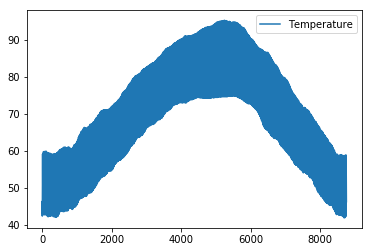

In [349]:
weather2.plot()

In [351]:

# Convert the 'Date' column into a collection of datetime objects: df.Date
weather2.Date = pd.to_datetime(weather2.Date)

# Set the index to be the converted 'Date' column
weather2.set_index('Date', inplace=True)


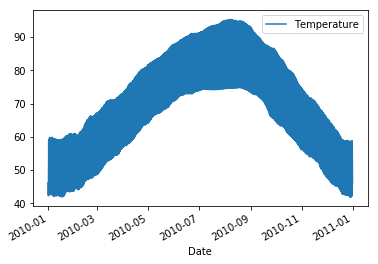

In [352]:
weather2.plot()

<p id = 'pi'> <p>
### Plotting date ranges, partial indexing

In [353]:
weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


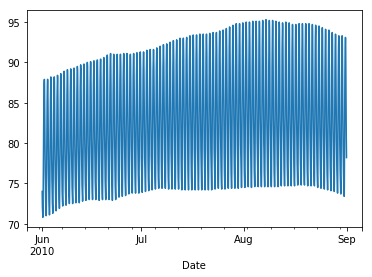

In [354]:
#Plot the summer temperatures using method chaining. The summer ranges from the months '2010-Jun' to '2010-Aug'
weather.Temperature['2010-Jun':'2010-Aug'].plot()

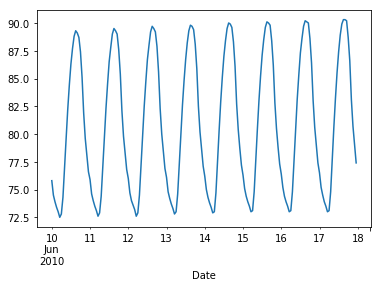

In [357]:
# Plot the one week data
weather.Temperature['2010-06-10':'2010-06-17'].plot()


<p id = 'austin'> <p>
## Case Study : Sunlight in Austin

### Reading in data file

In [377]:
more ./data/NOAA_QCLCD_2011_hourly_13904.txtsvc

In [392]:
df = pd.read_csv('./data/NOAA_QCLCD_2011_hourly_13904.txt')
df.head()

,13904,20110101,0053,12,OVC045,,10.00,.1,.2,.3,...,.18,.19,29.95,.20,AA,.21,.22,.23,29.95.1,.24
0,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
1,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
2,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
3,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,
4,13904,20110101,553,12,BKN065,,10.00,,,,...,015,,30.06,,AA,,,,30.06,


In [404]:
# Read in the data file with header=None: df_headers
df = pd.read_csv('./data/NOAA_QCLCD_2011_hourly_13904.txt', header=None)
df.head()



,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


### Re-assigning column names

In [405]:
column_labels ='Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

In [406]:
column_labels

'Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,dry_bulb_faren,dry_bulb_farenFlag,dry_bulb_cel,dry_bulb_celFlag,wet_bulb_faren,wet_bulb_farenFlag,wet_bulb_cel,wet_bulb_celFlag,dew_point_faren,dew_point_farenFlag,dew_point_cel,dew_point_celFlag,relative_humidity,relative_humidityFlag,wind_speed,wind_speedFlag,wind_direction,wind_directionFlag,value_for_wind_character,value_for_wind_characterFlag,station_pressure,station_pressureFlag,pressure_tendency,pressure_tendencyFlag,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk'

In [407]:
column_labels_list = column_labels.split(',')


In [408]:
list_to_drop = ['sky_conditionFlag',
 'visibilityFlag',
 'wx_and_obst_to_vision',
 'wx_and_obst_to_visionFlag',
 'dry_bulb_farenFlag',
 'dry_bulb_celFlag',
 'wet_bulb_farenFlag',
 'wet_bulb_celFlag',
 'dew_point_farenFlag',
 'dew_point_celFlag',
 'relative_humidityFlag',
 'wind_speedFlag',
 'wind_directionFlag',
 'value_for_wind_character',
 'value_for_wind_characterFlag',
 'station_pressureFlag',
 'pressure_tendencyFlag',
 'pressure_tendency',
 'presschange',
 'presschangeFlag',
 'sea_level_pressureFlag',
 'hourly_precip',
 'hourly_precipFlag',
 'altimeter',
 'record_type',
 'altimeterFlag',
 'junk']

In [409]:
df.columns = column_labels_list

In [410]:
df.head()

,Wban,date,Time,StationType,sky_condition,sky_conditionFlag,visibility,visibilityFlag,wx_and_obst_to_vision,wx_and_obst_to_visionFlag,...,presschange,presschangeFlag,sea_level_pressure,sea_level_pressureFlag,record_type,hourly_precip,hourly_precipFlag,altimeter,altimeterFlag,junk
0,13904,20110101,53,12,OVC045,,10.00,,,,...,,,29.95,,AA,,,,29.95,
1,13904,20110101,153,12,OVC049,,10.00,,,,...,,,30.01,,AA,,,,30.02,
2,13904,20110101,253,12,OVC060,,10.00,,,,...,030,,30.01,,AA,,,,30.02,
3,13904,20110101,353,12,OVC065,,10.00,,,,...,,,30.03,,AA,,,,30.04,
4,13904,20110101,453,12,BKN070,,10.00,,,,...,,,30.04,,AA,,,,30.04,


In [411]:
df_dropped = df.drop(list_to_drop, axis = 'columns')

In [412]:
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


<p id ='clean'><p>
### Cleaning and tidying datetime data
Your job is to clean up the date and Time columns and combine them into a datetime collection to be used as the Index.


In [413]:
# Convert the date column to string: df_dropped['date']
df_dropped.date = df_dropped.date.astype('str')
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,53,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [422]:
# Pad leading zeros to the Time column: df_dropped['Time']
df_dropped['Time'] = df_dropped['Time'].apply(lambda x:'{:0>4}'.format(x))
df_dropped.Time.head()

0    0053
1    0153
2    0253
3    0353
4    0453
Name: Time, dtype: object

In [415]:
# Concatenate the new date and Time columns: date_string
date_string = df_dropped.date+df_dropped.Time


In [423]:
# Convert the date_string Series to datetime: date_times
date_times = pd.to_datetime(date_string, format='%Y%m%d%H%M')


In [424]:
df_dropped.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
0,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
1,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
3,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
4,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [426]:
df_clean =df_dropped.set_index(date_times)

In [427]:
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51,10.6,38,3.1,15,-9.4,24,15,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51,10.6,37,3.0,14,-10.0,23,10,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51,10.6,37,2.9,13,-10.6,22,15,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50,10.0,38,3.1,17,-8.3,27,7,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50,10.0,37,2.8,15,-9.4,25,11,020,29.51,30.04


In [432]:
df_clean.loc['2011-jun-20 08:00:00':'2011-jun-20 09:00:00', 'dry_bulb_faren']

2011-06-20 08:27:00     M
2011-06-20 08:28:00     M
2011-06-20 08:29:00     M
2011-06-20 08:30:00     M
2011-06-20 08:31:00     M
2011-06-20 08:32:00     M
2011-06-20 08:33:00     M
2011-06-20 08:34:00     M
2011-06-20 08:35:00     M
2011-06-20 08:53:00    83
Name: dry_bulb_faren, dtype: object

In [433]:
df_clean['dry_bulb_faren'] = pd.to_numeric(df_clean.dry_bulb_faren, errors='coerce')

In [435]:
df_clean.loc['2011-jun-20 08:00:00':'2011-jun-20 09:00:00', 'dry_bulb_faren']

2011-06-20 08:27:00     NaN
2011-06-20 08:28:00     NaN
2011-06-20 08:29:00     NaN
2011-06-20 08:30:00     NaN
2011-06-20 08:31:00     NaN
2011-06-20 08:32:00     NaN
2011-06-20 08:33:00     NaN
2011-06-20 08:34:00     NaN
2011-06-20 08:35:00     NaN
2011-06-20 08:53:00    83.0
Name: dry_bulb_faren, dtype: float64

In [436]:
# Convert the wind_speed and dew_point_faren columns to numeric values
df_clean['wind_speed'] = pd.to_numeric(df_clean['wind_speed'], errors='coerce')
df_clean['dew_point_faren'] = pd.to_numeric(df_clean['dew_point_faren'], errors='coerce')

<p id = 'stEDA'> <p>
### Statistical EDA

In [437]:
# Print the median of the dry_bulb_faren column
df_clean.dry_bulb_faren.median()

72.0

In [438]:
# Print the median of the dry_bulb_faren column for the time range '2011-Apr':'2011-Jun'
print(df_clean.loc['2011-Apr':'2011-Jun', 'dry_bulb_faren'].median())


78.0


In [442]:
# Print the median of the dry_bulb_faren column for the month of January
print(df_clean.loc['2011-Jan', 'dry_bulb_faren'].median())

48.0


### Signal variance
You're now ready to compare the 2011 weather data with the 30-year normals reported in 2010. You can ask questions such as, on average, how much hotter was every day in 2011 than expected from the 30-year average?



In [449]:
df_climate = weather.copy()
df_climate.shape

(8759, 3)

In [444]:
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50.0,10.0,38,3.1,17.0,-8.3,27,7.0,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50.0,10.0,37,2.8,15.0,-9.4,25,11.0,020,29.51,30.04


In [474]:
# Downsample df_clean by day and aggregate by mean: daily_mean_2011
daily_mean_2011 = df_clean.resample('D').mean()
daily_mean_2011.head()



,Wban,StationType,dry_bulb_faren,dew_point_faren,wind_speed
2011-01-01,13904,12,50.166667,20.500000,11.083333
2011-01-02,13904,12,39.416667,19.708333,4.166667
2011-01-03,13904,12,46.846154,35.500000,2.653846
2011-01-04,13904,12,53.367347,50.408163,2.510204
2011-01-05,13904,12,57.965517,40.068966,4.689655


In [475]:
# Extract the dry_bulb_faren column from daily_mean_2011 using .values: daily_temp_2011
daily_temp_2011 = daily_mean_2011['dry_bulb_faren'].values

daily_temp_2011

array([50.16666667, 39.41666667, 46.84615385, 53.36734694, 57.96551724,
       46.95833333, 51.91666667, 51.81481481, 43.61363636, 38.27777778,
       34.74074074, 34.04166667, 35.875     , 43.29032258, 46.90625   ,
       49.39473684, 51.79310345, 52.97619048, 50.60714286, 47.44117647,
       35.25      , 43.        , 44.1       , 47.625     , 47.83333333,
       42.375     , 49.64      , 53.66666667, 60.65517241, 67.25806452,
       62.1875    , 38.40625   , 22.125     , 24.03571429, 26.15384615,
       42.33333333, 53.64      , 44.8       , 46.28      , 34.08571429,
       29.08333333, 35.08333333, 41.29166667, 52.25      , 53.89473684,
       65.52631579, 66.24242424, 68.5625    , 68.6969697 , 65.25714286,
       69.82758621, 68.81481481, 57.23076923, 66.        , 70.09677419,
       54.75      , 62.82857143, 72.23333333, 63.2       , 53.375     ,
       56.04166667, 57.67857143, 65.19354839, 55.96      , 50.16666667,
       58.03125   , 71.90625   , 58.92307692, 53.125     , 56.91

In [476]:
# Downsample df_climate by day and aggregate by mean: daily_climate
df_climate = df_climate.resample('D').mean()
print(df_climate.shape)
df_climate.head()


(365, 3)


,Temperature,DewPoint,Pressure
Date,,,
2010-01-01,49.337500,37.716667,1.0
2010-01-02,49.795833,38.370833,1.0
2010-01-03,49.900000,38.279167,1.0
2010-01-04,49.729167,38.008333,1.0
2010-01-05,49.841667,38.087500,1.0


In [477]:
# Extract the Temperature column from daily_climate using .reset_index(): daily_temp_climate
daily_climate.reset_index()
daily_temp_climate = daily_climate['Temperature']

In [478]:
daily_temp_climate

Date
2010-01-01    49.337500
2010-01-02    49.795833
2010-01-03    49.900000
2010-01-04    49.729167
2010-01-05    49.841667
2010-01-06    49.679167
2010-01-07    49.491667
2010-01-08    49.366667
2010-01-09    49.354167
2010-01-10    49.354167
2010-01-11    49.245833
2010-01-12    49.279167
2010-01-13    49.275000
2010-01-14    49.158333
2010-01-15    49.154167
2010-01-16    49.245833
2010-01-17    49.200000
2010-01-18    49.370833
2010-01-19    49.645833
2010-01-20    49.745833
2010-01-21    50.166667
2010-01-22    50.608333
2010-01-23    50.820833
2010-01-24    50.850000
2010-01-25    50.970833
2010-01-26    51.116667
2010-01-27    51.145833
2010-01-28    51.220833
2010-01-29    51.233333
2010-01-30    51.133333
                ...    
2010-12-02    54.858333
2010-12-03    54.545833
2010-12-04    54.195833
2010-12-05    53.837500
2010-12-06    53.587500
2010-12-07    53.283333
2010-12-08    53.037500
2010-12-09    52.770833
2010-12-10    52.408333
2010-12-11    52.083333
2010-12-12 

In [479]:


# Compute the difference between the two arrays and print the mean difference
difference = daily_temp_2011 - daily_temp_climate
print(difference.mean())

1.3301831870056482


### Sunny or cloudy


On average, how much hotter is it when the sun is shining? In this exercise, you will compare temperatures on sunny 
days against temperatures on overcast days.  
The DataFrame df_clean from previous exercises has been provided for you. The column 'sky_condition' provides information about whether the day was sunny ('CLR') or overcast ('OVC').



In [487]:
df_clean.sky_condition.unique()

array(['OVC045', 'OVC049', 'OVC060', ..., 'FEW019 BKN032 BKN095',
       'FEW019 SCT032 BKN100', 'SCT021 BKN028'], dtype=object)

In [490]:
# Using df_clean, when is sky_condition 'CLR'?
is_sky_clear = df_clean['sky_condition']=='CLR'
# Filter df_clean using is_sky_clear
sunny = df_clean[is_sky_clear]
sunny.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 13:53:00,13904,20110101,1353,12,CLR,10.00,59.0,15.0,45,7.0,26.0,-3.3,28,14.0,010,29.63,30.16
2011-01-01 14:53:00,13904,20110101,1453,12,CLR,10.00,59.0,15.0,45,7.2,27.0,-2.8,29,16.0,360,29.63,30.16
2011-01-01 15:53:00,13904,20110101,1553,12,CLR,10.00,57.0,13.9,44,6.6,27.0,-2.8,32,11.0,350,29.63,30.17
2011-01-01 16:53:00,13904,20110101,1653,12,CLR,10.00,55.0,12.8,43,6.1,27.0,-2.8,34,13.0,040,29.65,30.18
2011-01-01 17:53:00,13904,20110101,1753,12,CLR,10.00,50.0,10.0,40,4.5,26.0,-3.3,39,10.0,040,29.66,30.21


In [491]:
# Resample sunny by day then calculate the max
sunny_daily_max = sunny.resample('D').max()
sunny_daily_max


,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,2353,12.0,CLR,59.0,8.3,45,7.2,28.0,-6.1,53,16.0,360,29.78,30.33
2011-01-02,13904.0,20110102,2253,12.0,CLR,35.0,1.7,32,0.1,28.0,-7.2,76,8.0,360,29.82,30.38
2011-01-03,13904.0,20110103,0453,12.0,CLR,32.0,0.0,29,-1.9,26.0,-4.4,85,0.0,000,29.71,30.27
2011-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-05,13904.0,20110105,2353,12.0,CLR,35.0,1.7,33,0.3,29.0,-1.7,79,0.0,000,29.54,30.08
2011-01-06,13904.0,20110106,0553,12.0,CLR,40.0,4.4,36,2.1,30.0,-2.8,89,7.0,290,29.57,30.10
2011-01-07,13904.0,20110107,2353,12.0,CLR,70.0,8.9,51,4.6,31.0,-2.2,70,8.0,360,29.36,29.89
2011-01-08,13904.0,20110108,0553,12.0,CLR,46.0,7.8,39,4.0,31.0,-2.2,79,8.0,360,29.39,29.92
2011-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [492]:
# Using df_clean, when does sky_condition contain 'OVC'?
is_sky_overcast = df_clean['sky_condition'].str.contains('OVC')

# Filter df_clean using is_sky_overcast
overcast = df_clean[is_sky_overcast]

# Resample overcast by day then calculate the max
overcast_daily_max = overcast.resample('D').max()

# See the result
overcast_daily_max.head()

,Wban,date,Time,StationType,sky_condition,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01,13904.0,20110101,0353,12.0,OVC065,51.0,10.6,38,3.1,17.0,-9.4,27,15.0,360,29.51,30.03
2011-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-01-03,13904.0,20110103,2353,12.0,SCT042 OVC055,58.0,9.4,49,9.7,45.0,7.0,79,10.0,200,29.70,M
2011-01-04,13904.0,20110104,2353,12.0,SCT010 OVC016,57.0,8.9,56,9.4,56.0,8.9,100,8.0,VR,29.59,M
2011-01-05,13904.0,20110105,0653,12.0,SCT006 OVC011,57.0,14.0,56,13.5,56.0,13.3,96,3.0,250,29.48,M


In [493]:
# Calculate the mean of sunny_daily_max
sunny_daily_max_mean = sunny_daily_max.mean()

# Calculate the mean of overcast_daily_max
overcast_daily_max_mean = overcast_daily_max.mean()

# Print the difference (sunny minus overcast)
print(sunny_daily_max_mean- overcast_daily_max_mean)

Wban               0.000000
StationType        0.000000
dry_bulb_faren     6.504304
dew_point_faren   -4.339286
wind_speed        -3.246062
dtype: float64


Terrific temperature computing! The average daily maximum dry bulb temperature was 6.5 degrees Fahrenheit higher on sunny days compared to overcast days.



### Weekly average temperature and visibility
Is there a correlation between temperature and visibility? Let's find out.   

In this exercise, your job is to plot the weekly average temperature and visibility as subplots. To do this, you need to first select the appropriate columns and then resample by week, aggregating the mean.




In [494]:
df_clean.head()

,Wban,date,Time,StationType,sky_condition,visibility,dry_bulb_faren,dry_bulb_cel,wet_bulb_faren,wet_bulb_cel,dew_point_faren,dew_point_cel,relative_humidity,wind_speed,wind_direction,station_pressure,sea_level_pressure
2011-01-01 00:53:00,13904,20110101,0053,12,OVC045,10.00,51.0,10.6,38,3.1,15.0,-9.4,24,15.0,360,29.42,29.95
2011-01-01 01:53:00,13904,20110101,0153,12,OVC049,10.00,51.0,10.6,37,3.0,14.0,-10.0,23,10.0,340,29.49,30.01
2011-01-01 02:53:00,13904,20110101,0253,12,OVC060,10.00,51.0,10.6,37,2.9,13.0,-10.6,22,15.0,010,29.49,30.01
2011-01-01 03:53:00,13904,20110101,0353,12,OVC065,10.00,50.0,10.0,38,3.1,17.0,-8.3,27,7.0,350,29.51,30.03
2011-01-01 04:53:00,13904,20110101,0453,12,BKN070,10.00,50.0,10.0,37,2.8,15.0,-9.4,25,11.0,020,29.51,30.04


In [512]:
# Select the visibility and dry_bulb_faren columns and resample them: weekly_mean
weekly_mean = df_clean[['visibility','dry_bulb_faren']].resample('W').mean()

In [515]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10337 entries, 2011-01-01 00:53:00 to 2011-12-31 23:53:00
Data columns (total 17 columns):
Wban                  10337 non-null int64
date                  10337 non-null object
Time                  10337 non-null object
StationType           10337 non-null int64
sky_condition         10337 non-null object
visibility            10325 non-null object
dry_bulb_faren        10326 non-null float64
dry_bulb_cel          10337 non-null object
wet_bulb_faren        10337 non-null object
wet_bulb_cel          10337 non-null object
dew_point_faren       10323 non-null float64
dew_point_cel         10337 non-null object
relative_humidity     10337 non-null object
wind_speed            10318 non-null float64
wind_direction        10337 non-null object
station_pressure      10337 non-null object
sea_level_pressure    10337 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 1.7+ MB


In [505]:
weekly_mean.corr()

,dry_bulb_faren
dry_bulb_faren,1.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x119bafb38>],
      dtype=object)

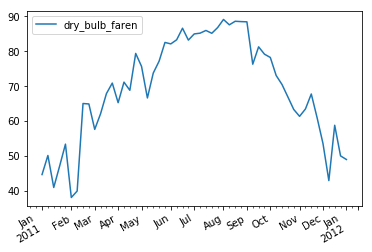

In [506]:
weekly_mean.plot(subplots=True)
